#### Import packages and read all Json Files

In [1]:
import os
import json
import pandas as pd
mergedRobbery=pd.DataFrame()
mergedDeception=pd.DataFrame()
mergedBurglary=pd.DataFrame()
directory = "E:/drive-download"
all_data = {}

for filename in os.listdir(directory):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(directory, filename)
             
        if filename.startswith("robbery"):
            # print('````````````````````````````````````````````````````')
            # print(file_path)
            rdf = pd.read_excel(file_path,header=None)
            print(mergedRobbery.shape)
            mergedRobbery=pd.concat([rdf,mergedRobbery],axis=0)
        if filename.startswith("burglary"):
            # print('````````````````````````````````````````````````````')
            # print(file_path)
            rdf = pd.read_excel(file_path,header=None)
            print(mergedBurglary.shape)
            mergedBurglary=pd.concat([rdf,mergedBurglary],axis=0)
        if filename.startswith("deception"):
            # print('````````````````````````````````````````````````````')
            # print(file_path)
            rdf = pd.read_excel(file_path,header=None)
            print(mergedDeception.shape)
            mergedDeception=pd.concat([rdf,mergedDeception],axis=0)

        # with open(file_path, "r", encoding="utf-8") as f:
        #     data = json.load(f)
        #     all_data[filename] = data

(0, 0)
(4746, 2)
(9894, 2)
(13445, 2)
(17607, 2)
(22280, 2)
(27985, 2)
(0, 0)
(1421, 2)
(2954, 2)
(4918, 2)
(6364, 2)
(7905, 2)
(9729, 2)
(0, 0)
(5453, 2)
(13938, 2)
(19208, 2)
(23974, 2)
(30286, 2)
(38067, 2)


# Deception

In [2]:
mergedDeception.head()

,0,1
0,-DOCSTART- -X- O O,NaN
1,VTM,O
2,owned,O
3,one,O
4,BOC,B-RELATED_BANK


In [3]:
#  set column names
mergedDeception.columns = ['text', 'label']
mergedDeception.label.value_counts()

O                               9591
I-METHOD                         285
B-AMOUNT                         177
B-MEANS                          126
B-METHOD                         117
I-TRANSACTION_MEANS              115
B-CHANNEL                         94
I-BEHAVIOUR                       82
I-HOW_PROPERTY_IS_TAKEN_AWAY      78
B-TRANSACTION_MEANS               78
B-HOW_PROPERTY_IS_TAKEN_AWAY      63
B-BEHAVIOUR                       54
I-AMOUNT                          51
I-MEANS                           50
B-RELATED_BANK                    46
B-GENDER                          45
I-LOC                             43
B-FREQUENCY                       35
I-CHANNEL                         30
B-TYPES                           18
I-TYPES                           16
B-LOC                             15
I-FREQUENCY                       13
B-LOG_TYPE                        13
B-BEHAVIOUR-                       9
B-NUMBER_OF_OCCURRENCE             9
I-BEHAVIOUR-                       9
I

In [4]:
# BHOW_PROPERTY_IS_TAKEN_AWAY
mergedDeception.loc[mergedDeception.label == 'BHOW_PROPERTY_IS_TAKEN_AWAY', 'text']

1053    Alipay
Name: text, dtype: object

In [5]:
# change BHOW_PROPERTY_IS_TAKEN_AWAY to B-HOW_PROPERTY_IS_TAKEN_AWAY
mergedDeception.loc[mergedDeception.label == 'BHOW_PROPERTY_IS_TAKEN_AWAY', 'label'] = 'B-HOW_PROPERTY_IS_TAKEN_AWAY'

In [6]:
# change IHOW_PROPERTY_IS_TAKEN_AWAY to B-HOW_PROPERTY_IS_TAKEN_AWAY
mergedDeception.loc[mergedDeception.label == 'IHOW_PROPERTY_IS_TAKEN_AWAY', 'label'] = 'I-HOW_PROPERTY_IS_TAKEN_AWAY'

In [7]:
mergedDeception.loc[mergedDeception.label == 'I-METHOS', 'label'] = 'I-METHOD'

In [8]:
mergedDeception.loc[mergedDeception.label == 'B-BEHAVIOR', 'label'] = 'B-BEHAVIOUR'

In [9]:
mergedDeception.loc[mergedDeception.label == 'B-MEANS-MEANS', 'label'] = 'B-MEANS'

In [10]:
mergedDeception.loc[mergedDeception.label == 'I-TITLE', 'text']

281    Scam)
Name: text, dtype: object

In [11]:
mergedDeception.loc[mergedDeception.label == 'I-NATIVE', 'text']

953    Kong.
Name: text, dtype: object

In [12]:
#  fill with NA ALL NULLS
mergedDeception.fillna('NA', inplace=True)


In [13]:
#  TAKE ALL ROWS WHICH START WITH B-:
mergedDeceptionminidataFrame=mergedDeception[mergedDeception['label'].str.startswith('B-')]

In [14]:
mergedDeceptionminidataFrame.label.value_counts()

B-AMOUNT                        177
B-MEANS                         127
B-METHOD                        117
B-CHANNEL                        94
B-TRANSACTION_MEANS              78
B-HOW_PROPERTY_IS_TAKEN_AWAY     64
B-BEHAVIOUR                      55
B-RELATED_BANK                   46
B-GENDER                         45
B-FREQUENCY                      35
B-TYPES                          18
B-LOC                            15
B-LOG_TYPE                       13
B-BEHAVIOUR-                      9
B-NUMBER_OF_OCCURRENCE            9
B-NATIVE                          4
B-TYPE_OF_VTM                     2
B-OFFENCE                         2
Name: label, dtype: int64

In [15]:
# change B- to empty string:
mergedDeceptionminidataFrame['label'] = mergedDeceptionminidataFrame['label'].str.replace('B-','')

C:\Users\user\AppData\Local\Temp\ipykernel_15844\730887885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedDeceptionminidataFrame['label'] = mergedDeceptionminidataFrame['label'].str.replace('B-','')


AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 1440x720 with 0 Axes>

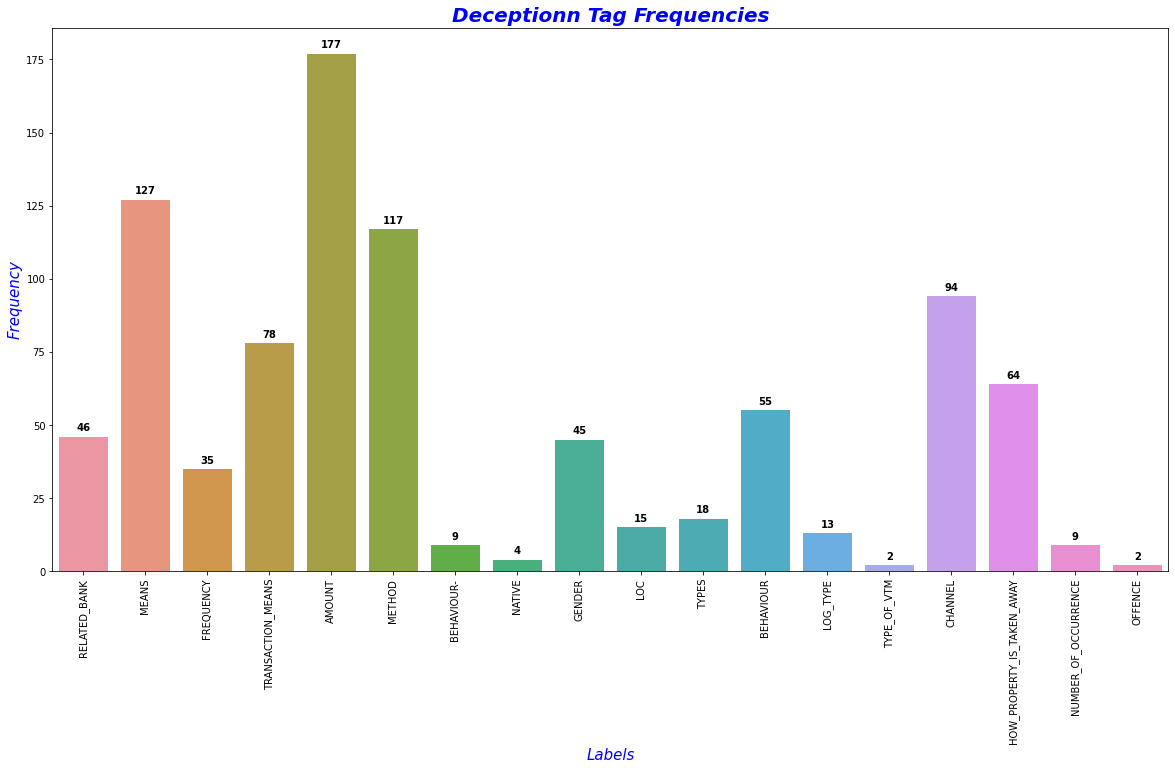

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize=(20,10))
print(ax1)
graph = sns.countplot(ax=ax1,x='label', data=mergedDeceptionminidataFrame)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 2,
        int(height),ha="center",fontweight='bold')
    i += 1
i=0

ax = sns.countplot(x=mergedDeceptionminidataFrame['label'], data=mergedDeceptionminidataFrame)
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, int(p.get_height())), ha='center', va='top', color='black', size=12)
plt.xticks(rotation=90)

plt.title('Deceptionn Tag Frequencies', color='blue', fontsize=20, fontweight='bold', fontstyle='italic')
plt.xlabel('Labels', color='blue', fontsize=15, fontstyle='italic')
plt.ylabel('Frequency', color='blue', fontsize=15, fontstyle='italic')
plt.show()
